<a href="https://colab.research.google.com/github/sadanrizqi/housing-simple-analysis/blob/main/housing-simple-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# In this project, I want to describe an approach to describe :

1. Simple Statisctics about 500 data survey
2. Major factors that determine higher price
3. What type of housing that we can get according to special value

In [ ]:
# Step 1: Calling the tools
df = pd.read_csv('Housing.csv')  # or .xlsx if you converted it

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Quick overview
pd.set_option('display.float_format', '{:,.1f}'.format)  #set to normal digit format
print(df.describe())
print(df.info())
print(df.isnull().sum())  #we check the missing data



             price     area  bedrooms  bathrooms  stories  parking
count        545.0    545.0     545.0      545.0    545.0    545.0
mean   4,766,729.2  5,150.5       3.0        1.3      1.8      0.7
std    1,870,439.6  2,170.1       0.7        0.5      0.9      0.9
min    1,750,000.0  1,650.0       1.0        1.0      1.0      0.0
25%    3,430,000.0  3,600.0       2.0        1.0      1.0      0.0
50%    4,340,000.0  4,600.0       3.0        1.0      2.0      0.0
75%    5,740,000.0  6,360.0       3.0        2.0      2.0      1.0
max   13,300,000.0 16,200.0       6.0        4.0      4.0      3.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories    

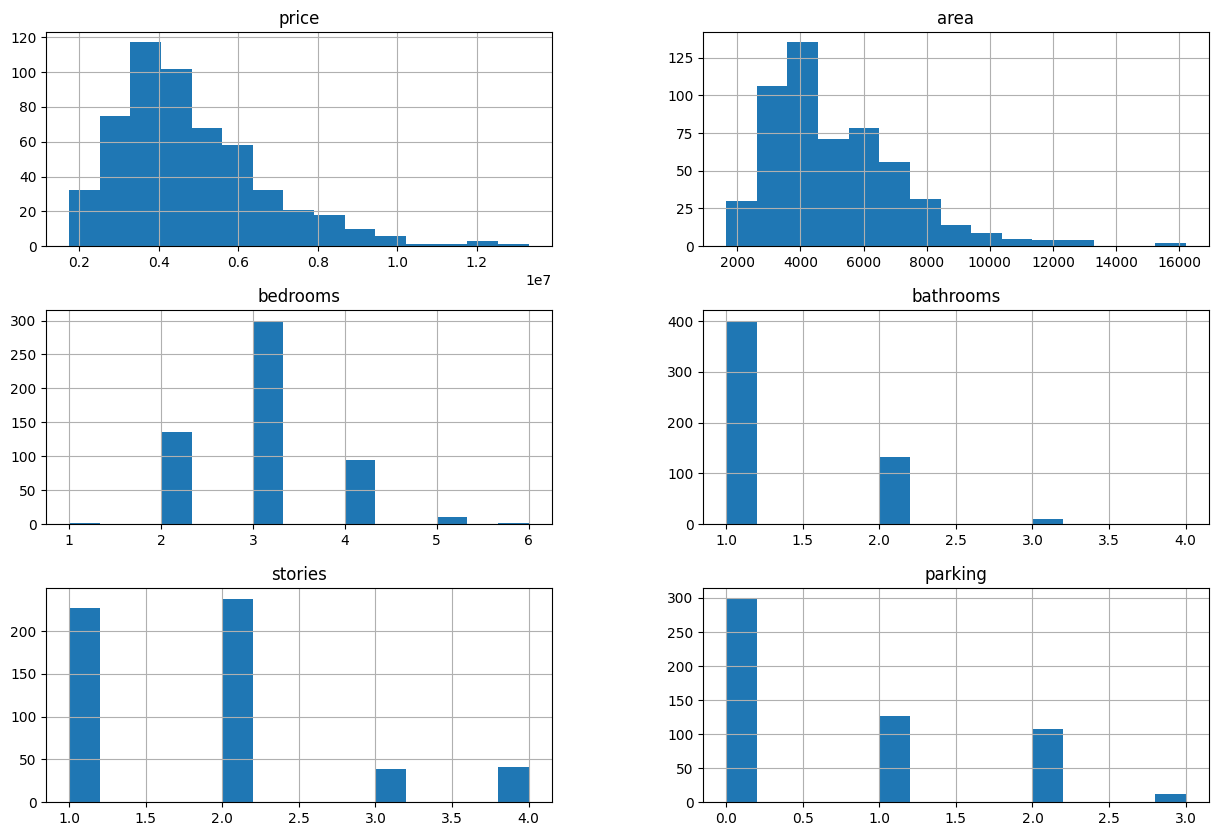

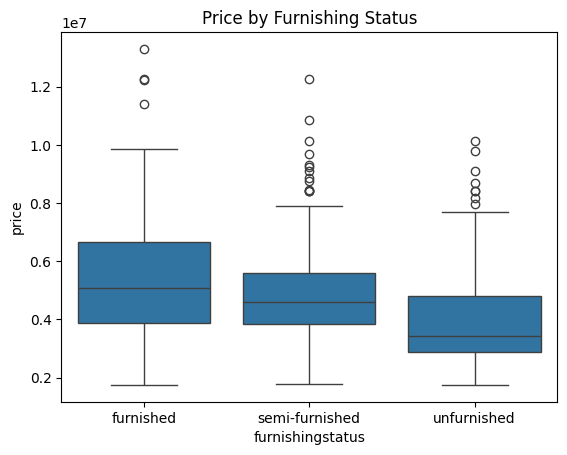

In [79]:
# Step 3: EDA

# Histograms for numeric features
numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df[numeric_cols].hist(bins=15, figsize=(15,10))
plt.show()

# Boxplot of price by furnishing status
sns.boxplot(x='furnishingstatus', y='price', data=df)
plt.title('Price by Furnishing Status')
plt.show()

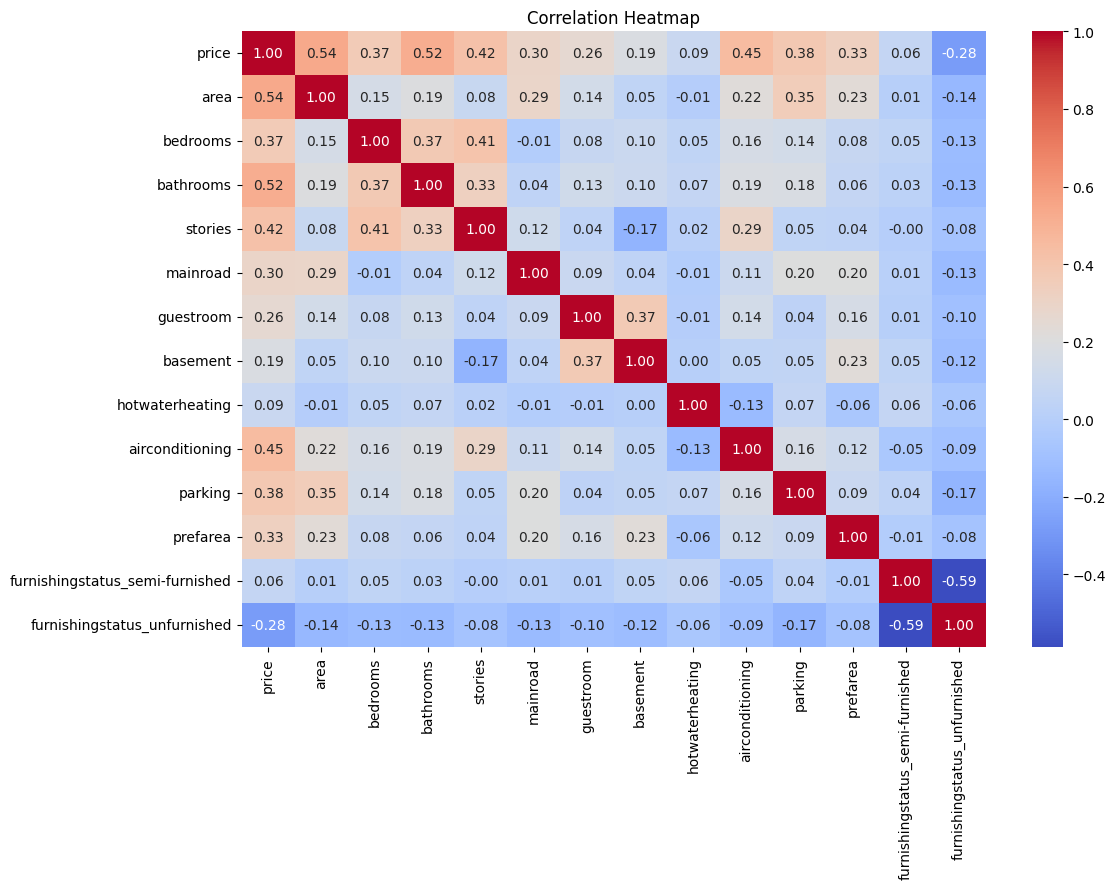

In [ ]:
# Convert binary categorical features to numeric (0 or 1)
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].apply(lambda x: 1 if x == 'yes' else 0)

# One-hot encode the 'furnishingstatus' column
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)


# Correlation heatmap
plt.figure(figsize=(12,8)) # Increased figure size for better readability
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f") # Added fmt=".2f" to format annotations
plt.title('Correlation Heatmap')
plt.show()

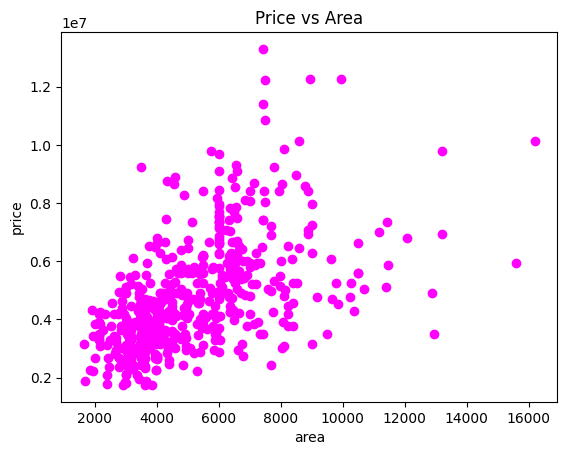

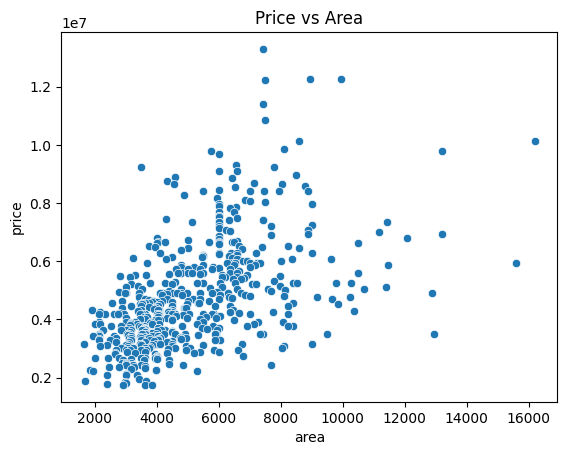

In [80]:
# Scatter plot price vs area using Matplotlib
plt.scatter(x=df['area'], y=df['price'], color='magenta')
plt.title('Price vs Area')
plt.xlabel('area')
plt.ylabel('price')
plt.show()

# Scatter plot price vs area using Seaborn (to get an alternative)
sns.scatterplot(x='area', y='price', data=df)
plt.title('Price vs Area')
plt.show()


In [81]:
# Step 4: Feature engineering example
df['total_rooms'] = df['bedrooms'] + df['bathrooms'] + df['guestroom']


In [82]:
# Step 5: Simple insight
correlation = df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'total_rooms']].corr()['price']
print("Correlation with price:")
print(correlation.sort_values(ascending=False))


Correlation with price:
price         1.0
total_rooms   0.5
area          0.5
bathrooms     0.5
stories       0.4
parking       0.4
bedrooms      0.4
Name: price, dtype: float64


In [85]:
# Step 6: We start to filter about specific value

target_price =  4766729
tolerance = 250000

# Filter houses within the range
subset = df[(df['price'] >= target_price - tolerance) &
            (df['price'] <= target_price + tolerance)]

# Look at feature patterns
print(subset[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
              'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
              'parking', 'prefarea', 'furnishingstatus']])

      area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
194   8150         3          2        1         1          1         1   
195   4410         4          3        2         1          0         1   
196   7686         3          1        1         1          1         1   
197   2800         3          2        2         0          0         1   
198   5948         3          1        2         1          0         0   
199   4200         3          1        2         1          0         0   
200   4520         3          1        2         1          0         1   
201   4095         3          1        2         0          1         1   
202   4120         2          1        1         1          0         1   
203   5400         4          1        2         1          0         0   
204   4770         3          1        1         1          1         1   
205   6300         3          1        1         1          0         0   
206   5800         2     

In [86]:
# Group and get average price for each combination
feature_combo = subset.groupby(['bedrooms', 'bathrooms', 'stories', 'mainroad',
                                'guestroom', 'basement', 'hotwaterheating',
                                'airconditioning', 'parking', 'prefarea',
                                'furnishingstatus'])['price'].mean().reset_index()

# Sort by closeness to target price
feature_combo['price_diff'] = abs(feature_combo['price'] - target_price)
feature_combo = feature_combo.sort_values('price_diff')

print(feature_combo.head(5))  # top 5 closest matches

    bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
46         4          2        2         1          0         0   
1          2          1        1         1          0         0   
32         3          1        2         1          0         1   
6          2          1        1         1          0         1   
2          2          1        1         1          0         0   

    hotwaterheating  airconditioning  parking  prefarea furnishingstatus  \
46                0                0        0         0   semi-furnished   
1                 0                1        2         1      unfurnished   
32                0                1        1         0        furnished   
6                 0                1        2         0   semi-furnished   
2                 0                1        3         0   semi-furnished   

         price  price_diff  
46 4,767,000.0       271.0  
1  4,760,000.0     6,729.0  
32 4,760,000.0     6,729.0  
6  4,760,000.0     6,729